# Logistic map

## Required modules

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Definition

The logistic map is defined the recurrence relation $x_n = x_{n-1} r (1 - x_{n-1}$ for a given value of $x_0$ and $r$.  The function `logistic_trajectory` computes the successive values of $x_n$ for starting value $x_0$ and given $r$ for the number of steps specified.

In [2]:
def logistic_trajectory(x0, r, steps=20):
    x = np.empty(steps)
    x[0] = x0
    for i in range(1, steps):
        x[i] = x[i - 1]*r*(1.0 - x[i - 1])
    return x

## Convergence

Plot the consecutive values of $x_n$ for $x_0 = 0.2$ and $x_0 = 0.5$ for a range of $r$ values.

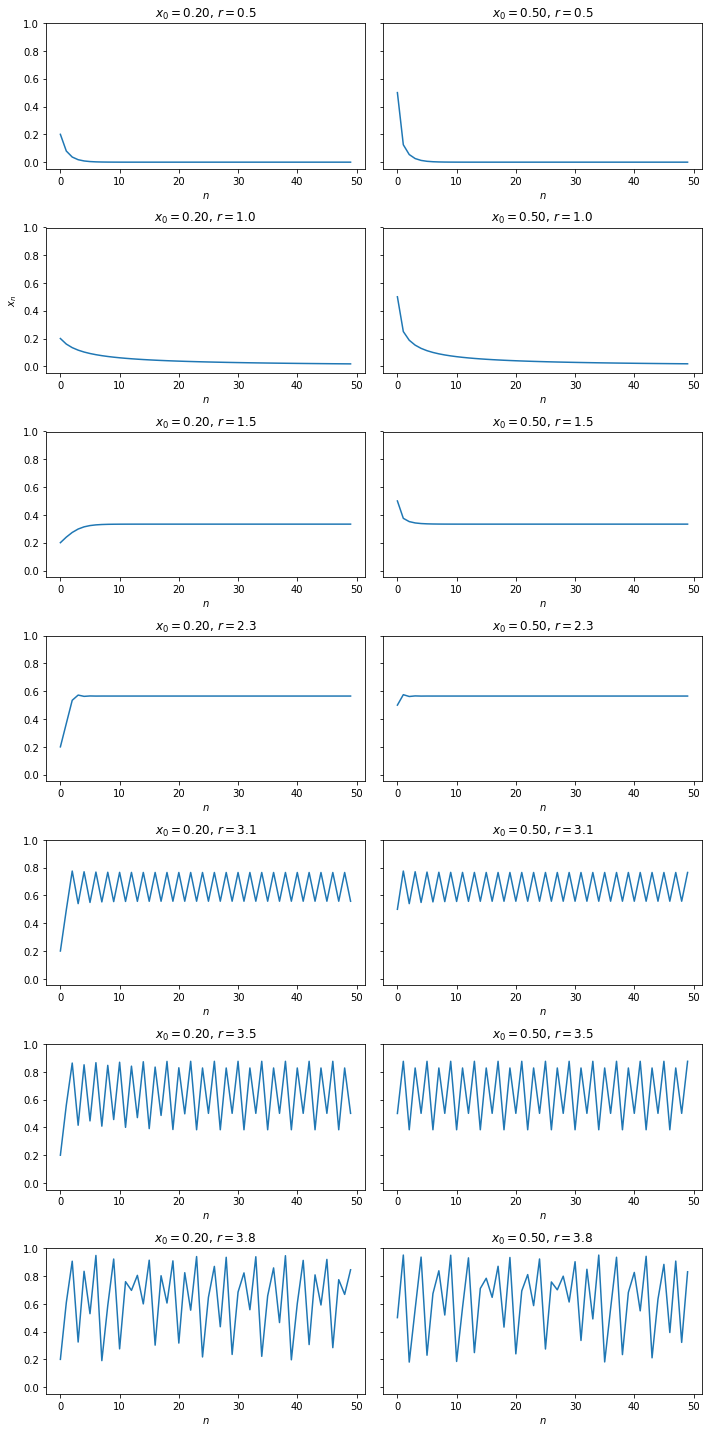

In [13]:
steps = 50
x0_values = [0.2, 0.5]
r_values = [0.5, 1.0, 1.5, 2.3, 3.1, 3.5, 3.8]
_, axes = plt.subplots(nrows=len(r_values), ncols=len(x0_values), figsize=(10, 20), sharey=True)
for i in range(len(r_values)):
    axes[1][0].set_ylabel(r'$x_n$')
for i, r in enumerate(r_values):
    for j, x0 in enumerate(x0_values):
        axes[i][j].plot(logistic_trajectory(x0, r, steps))
        axes[i][j].set_title(f'$x_0 = {x0:.2f}$, $r = {r}$')
        axes[i][j].set_xlabel(r'$n$')
plt.tight_layout()

For
  * $0 \leq r \leq 1$: $x_n \to 0$;
  * $1 < r < 3$: $x_n$ converges to a single value that depends on $r$;
  * $3 < r < 3.449$: the value of $x_n$ oscillates between two values;
  * $3.449 < r < 3.544$: the value of $x_n$ it oscillates between four values;
  * $3.544 < r$: the period keeps doubling.
  
The function `convergence` will compute the number of steps required until $|x_{n + p} - x_n| < \delta$ where $p$ is the period and $\delta \ll 1$.

In [9]:
def convergence(x0, r, period, delta=1.0e-7):
    n = 0
    x_prev = x0
    def do_steps(x, r):
        for _ in range(period):
            x = x*r*(1.0 - x)
        return x
    x = do_steps(x_prev, r)
    while (np.abs(x - x_prev)/x > delta):
        n += 2
        x_prev = x
        x = do_steps(x_prev, r)
    return n

Vectorize the function so that it can be applied to numpy arrays.

In [10]:
converge_vec = np.vectorize(convergence)

The convergence slows down when $r \to 3$.

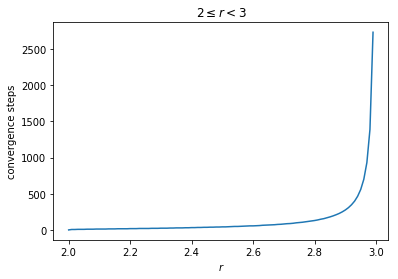

In [31]:
r_min, r_max = 2.0, 2.99
r_values = np.linspace(r_min, r_max, 100)
n_values = converge_vec(0.5, r_values, period=1)
_ = plt.plot(r_values, n_values)
_ = plt.xlabel('$r$')
_ = plt.ylabel('convergence steps')
_ = plt.title(r'$2 \leq r < 3$')

The same haapens for $r \to 3.449$.

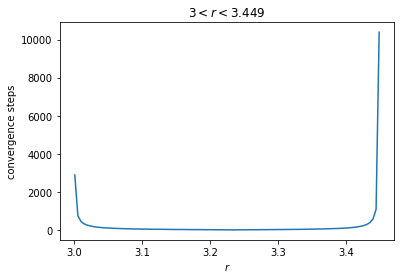

In [32]:
r_values = np.linspace(3.001, 3.449, 100)
n_values = converge_vec(0.5, r_values, period=2)
_ = plt.plot(r_values, n_values)
_ = plt.xlabel('$r$')
_ = plt.ylabel('convergence steps')
_ = plt.title(r'$3 < r < 3.449$')

## Function values

The following function computes the value of $x_n$ for a given value of $x_0$ and $r$ over the specified number of steps $n$.

In [8]:
def logistic_function(x0, r, steps=50):
    x = x0
    for _ in range(steps):
        x = r*x*(1.0 - x)
    return x

In [15]:
def compute_map(x, r, steps=1000):
    X, R = np.meshgrid(x, r)
    return logistic_function(X, R, steps)

### Classic visualization

The function below will create the classic vizualization of the logistic map.

In [79]:
def plot_map(x, r, steps=1_000):
    values = compute_map(x, r, steps=steps)
    r_values = np.repeat(r, x.shape[0]).reshape(values.shape)
    data = np.stack([r_values, values], axis=2).reshape(values.shape[0]*values.shape[1], 2)
    _ = plt.figure(figsize=(15, 10))
    _ = plt.plot(data[:, 0], data[:, 1], '.', markersize=1)
    _ = plt.xlabel('$r$')
    _ = plt.ylabel(r'$x_0$')

For the entire range of $r$ values, i.e., $0 \leq r \leq 4$.

For the entire range of $r$ values, i.e., $0 \leq r \leq 4$.

In [81]:
x = np.linspace(0.01, 0.99, 100)
r = np.linspace(0.0, 4.0, 500)

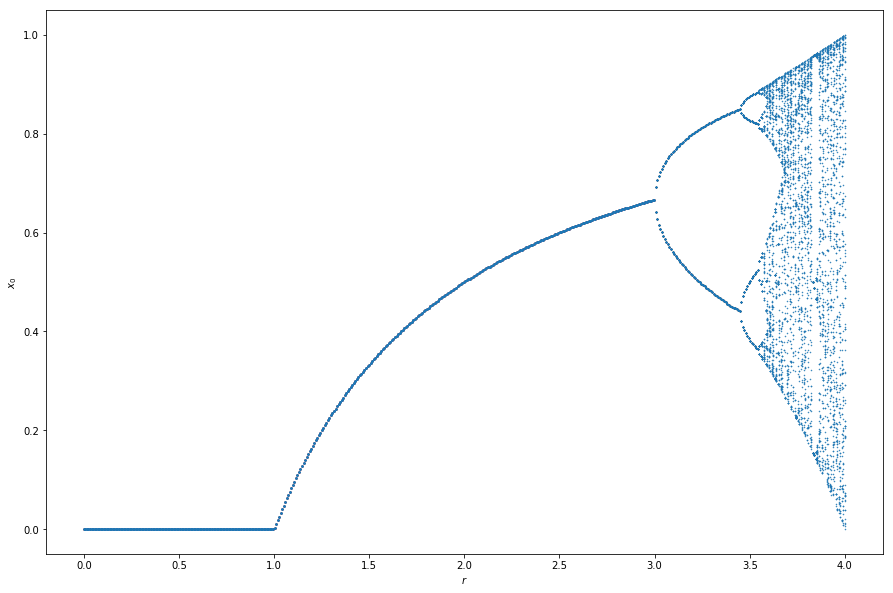

In [82]:
plot_map(x, r, steps=10_000)

For $3.4 \leq r \leq 4$.

In [83]:
x = np.linspace(0.01, 0.99, 100)
r = np.linspace(3.4, 4.0, 1_000)

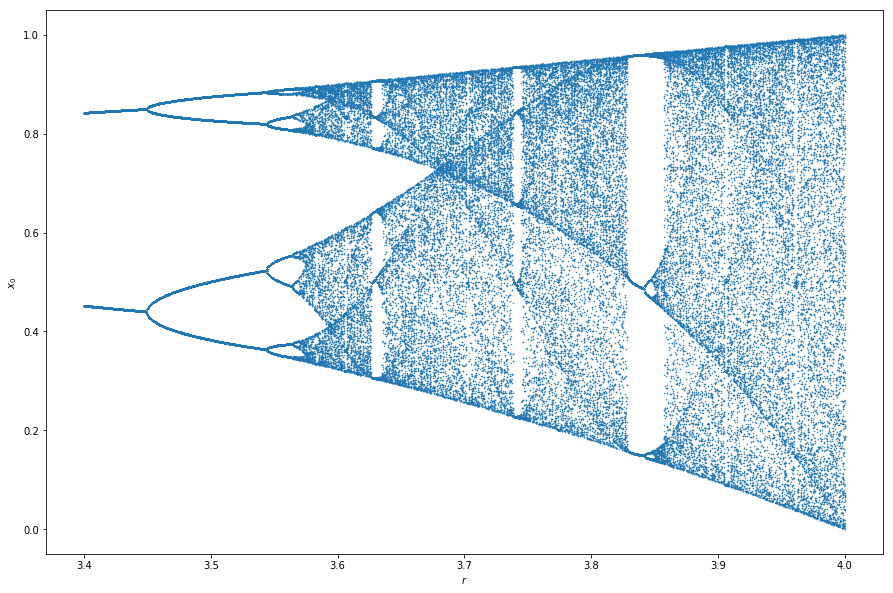

In [84]:
plot_map(x, r, steps=10_000)

### Heatmap visualization

Alternatively, the function can be visualized as a heatmap by the following function.

In [96]:
def plot_heatmap(x, r, steps=1_000):
    _ = plt.figure(figsize=(15, 30))
    _ = plt.imshow(np.transpose(compute_map(x, r, steps)), cmap=plt.cm.RdBu)
    _ = plt.xticks(np.linspace(0, len(r) + 1, 6), map(lambda x: f'{x:.2f}', np.linspace(r.min(), r.max(), 6)))
    _ = plt.yticks(np.linspace(0, len(x) + 1, 6), map(lambda x: f'{x:.2f}', np.linspace(x.min(), x.max(), 6)))
    _ = plt.xlabel('$r$')
    _ = plt.ylabel('$x_0$')

In [97]:
x = np.linspace(0.01, 0.99, 500)
r = np.linspace(2.8, 4.0, 1000)

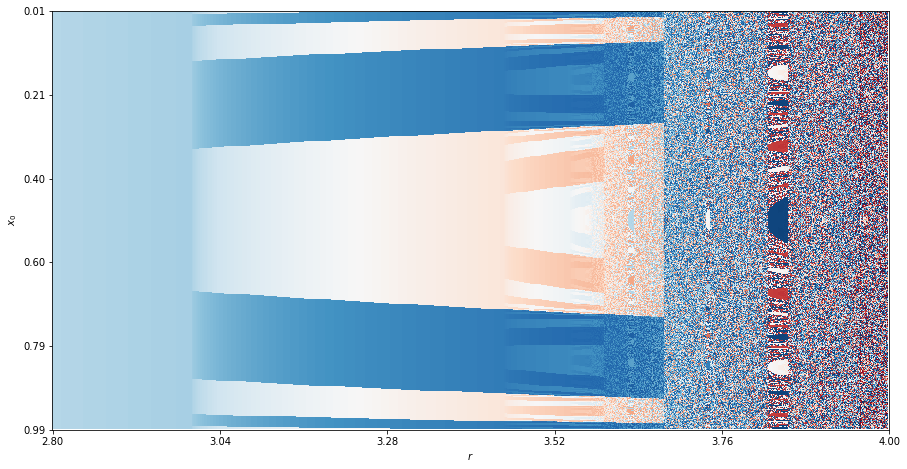

In [98]:
plot_heatmap(x, r, steps=10_000)

In [99]:
x = np.linspace(0.01, 0.99, 500)
r = np.linspace(3.4, 4.0, 1_000)

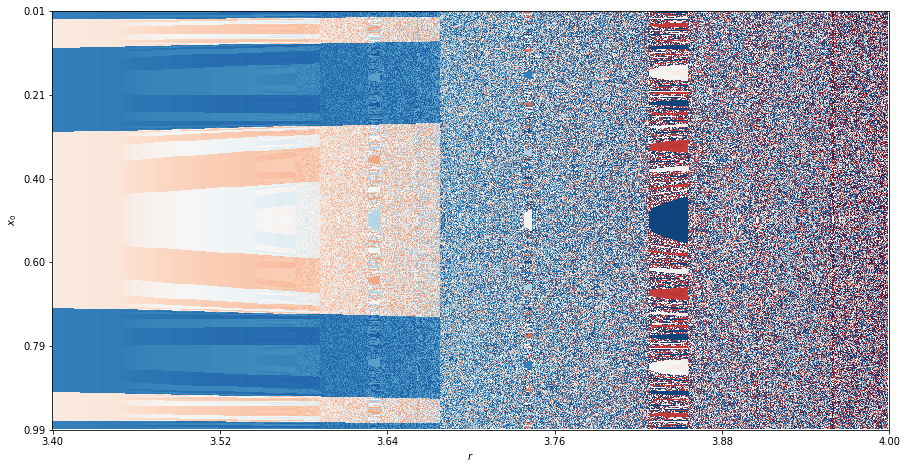

In [100]:
plot_heatmap(x, r, steps=10_000)